<a href="https://colab.research.google.com/github/ahanson-3/HANSON-Python-Portfolio/blob/main/TidyData_Noteboo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# prompt: import csv file from google drive

from google.colab import drive

import pandas as pd

# Replace 'your_file.csv' with the actual name of your CSV file
# Replace 'path/to/your/file' with the actual path to your file in Google Drive
file_path = '/content/drive/MyDrive/olympics_08_medalists.csv'

df = pd.read_csv(file_path)


In [10]:
# Melt the dataset into long format
df_melted = df.melt(id_vars=["medalist_name"], var_name="event", value_name="medal")

# Remove rows where the medal column is empty (""), since they don't contain any medal information and don't provide any observations.
# This way each observation has its own row.
df_melted = df_melted[df_melted['medal'] != ""]

# Split the event column into the event type (male/female) and the specific sport (archery, athletics)
# This way each variable has it's own column.
# For example, "male_archery" -> "male" and "archery". Gender and event
df_melted[['gender', 'event_type']] = df_melted['event'].str.split('_', expand=True)

# Drop the original 'event' column if needed and view the final cleaned DataFrame
df_melted = df_melted.drop(columns=["event"])

# Reorder columns for readability
df_melted = df_melted[['medalist_name', 'gender', 'event_type', 'medal']]

# Final cleaned DataFrame
print(df_melted)

            medalist_name gender             event_type medal
0         Aaron Armstrong   male                archery   NaN
1           Aaron Peirsol   male                archery   NaN
2        Abdullo Tangriev   male                archery   NaN
3       Abeer Abdelrahman   male                archery   NaN
4                 Abhinav   male                archery   NaN
...                   ...    ...                    ...   ...
131245        Éver Banega   male  greco-roman wrestling   NaN
131246  Ólafur Stefánsson   male  greco-roman wrestling   NaN
131247      Óscar Brayson   male  greco-roman wrestling   NaN
131248   Łukasz Pawłowski   male  greco-roman wrestling   NaN
131249        Živko Gocić   male  greco-roman wrestling   NaN

[131250 rows x 4 columns]


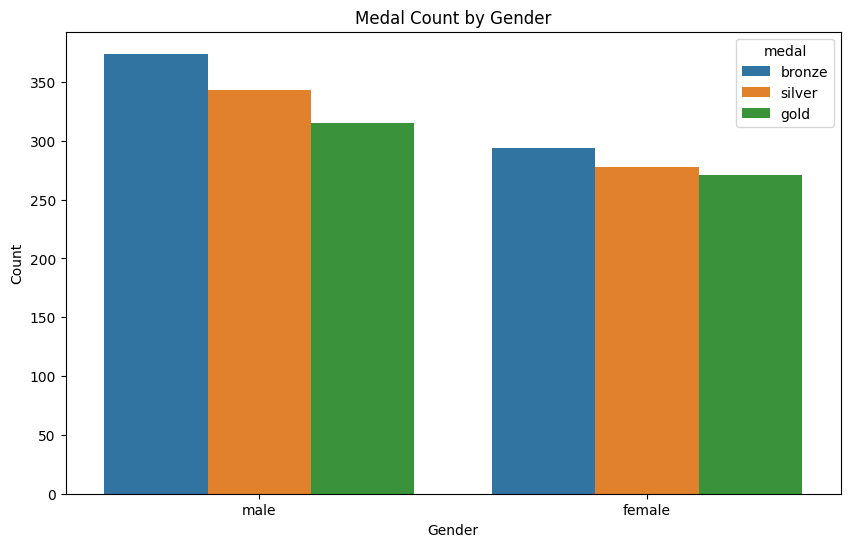

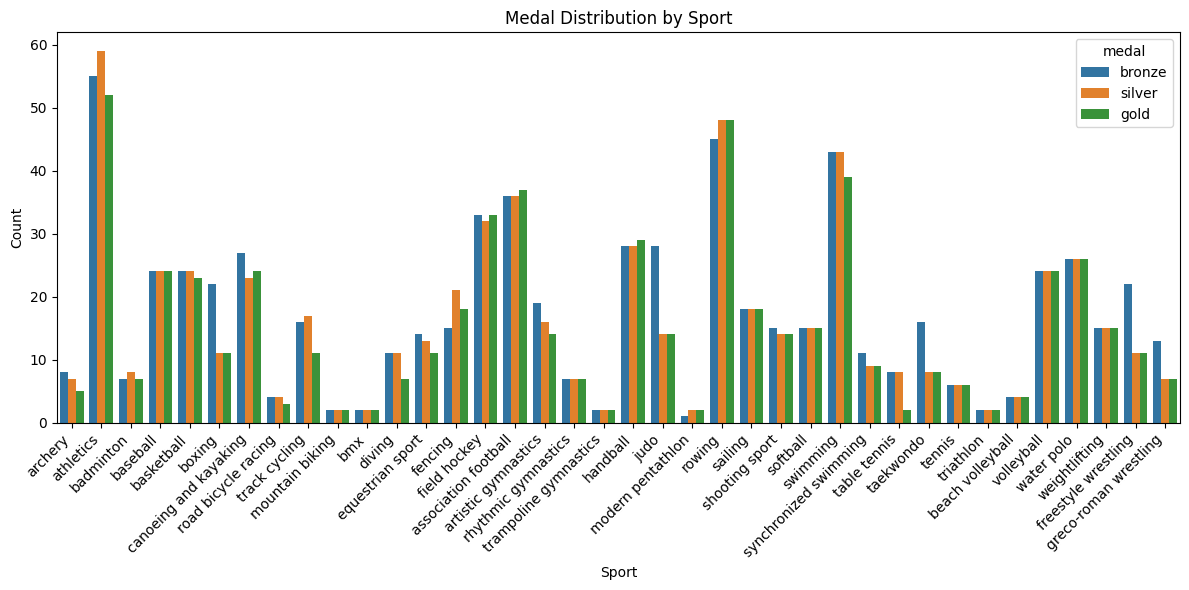

In [12]:
# prompt: Visualization: Include at least two visualizations that reflects the newly cleaned data in the df_melted

import matplotlib.pyplot as plt
import seaborn as sns

# Visualization 1: Count of medals per gender
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='medal', data=df_melted)
plt.title('Medal Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Visualization 2:  Distribution of medal types across different sports
plt.figure(figsize=(12, 6))
sns.countplot(x='event_type', hue='medal', data=df_melted)
plt.title('Medal Distribution by Sport')
plt.xlabel('Sport')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [13]:


# Create a pivot table to count medals by gender and event type
pivot_table = pd.pivot_table(df_melted, values='medal', index='gender', columns='event_type', aggfunc='count')

pivot_table


event_type,archery,artistic gymnastics,association football,athletics,badminton,baseball,basketball,beach volleyball,bmx,boxing,...,synchronized swimming,table tennis,taekwondo,tennis,track cycling,trampoline gymnastics,triathlon,volleyball,water polo,weightlifting
gender,,,,,,,,,,,,,,,,,,,,,
female,9.0,20.0,54.0,81.0,10.0,NaN,36.0,6.0,3.0,NaN,...,29.0,9.0,16.0,9.0,9.0,3.0,3.0,36.0,39.0,21.0
male,11.0,29.0,55.0,85.0,12.0,72.0,35.0,6.0,3.0,44.0,...,NaN,9.0,16.0,9.0,35.0,3.0,3.0,36.0,39.0,24.0
